In [2]:
!pip install kaggle
# !kaggle datasets download -d xhlulu/140k-real-and-fake-faces

In [10]:
import os
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import Xception
from sklearn.metrics import classification_report
from tensorflow.keras import Model

In [11]:
import os
import pandas as pd
from zipfile import ZipFile

# Ensure the Kaggle API credentials are set up
os.environ['KAGGLE_USERNAME'] = 'renadataema'
os.environ['KAGGLE_KEY'] = 'd707e30efb735d018b3e697236b3bbe1'

# Download the dataset
!kaggle datasets download -d xhlulu/140k-real-and-fake-faces

# Unzip the downloaded file
with ZipFile('140k-real-and-fake-faces.zip', 'r') as zip_ref:
    zip_ref.extractall('140k-real-and-fake-faces')

# Load the CSV files into pandas DataFrames
train_data = pd.read_csv('140k-real-and-fake-faces/train.csv')
test_data = pd.read_csv('140k-real-and-fake-faces/test.csv')
validation_data = pd.read_csv('140k-real-and-fake-faces/valid.csv')

# Define the path to the images
path = '140k-real-and-fake-faces/real_vs_fake/real-vs-fake'

# Print the first few rows of the train data
print(train_data.head())


Dataset URL: https://www.kaggle.com/datasets/xhlulu/140k-real-and-fake-faces
License(s): other
140k-real-and-fake-faces.zip: Skipping, found more recently modified local copy (use --force to force download)
   Unnamed: 0                                      original_path     id  \
0           0  /kaggle/input/flickrfaceshq-dataset-nvidia-par...  31355   
1           1  /kaggle/input/flickrfaceshq-dataset-nvidia-par...  02884   
2           2  /kaggle/input/flickrfaceshq-dataset-nvidia-par...  33988   
3           3  /kaggle/input/flickrfaceshq-dataset-nvidia-par...  53875   
4           4  /kaggle/input/flickrfaceshq-dataset-nvidia-par...  24149   

   label label_str                  path  
0      1      real  train/real/31355.jpg  
1      1      real  train/real/02884.jpg  
2      1      real  train/real/33988.jpg  
3      1      real  train/real/53875.jpg  
4      1      real  train/real/24149.jpg  


Preprocessing

In [12]:
train_image_generator = ImageDataGenerator(rescale=1./255.,preprocessing_function=preprocess_input)

train_data_generator = train_image_generator.flow_from_dataframe(
    dataframe=train_data,
    directory=path,
    x_col ='path',
    y_col ='label_str',
    color_mode="rgb",
    target_size=(256, 256),
    class_mode="binary",
    batch_size=32,
    shuffle = True
)

Found 100000 validated image filenames belonging to 2 classes.


In [13]:
validation_image_generator = ImageDataGenerator(rescale=1./255.,preprocessing_function=preprocess_input)
test_image_generator = ImageDataGenerator(rescale=1./255.,preprocessing_function=preprocess_input)

validation_data_generator = validation_image_generator.flow_from_dataframe(
    dataframe=validation_data,
    directory=path,
    x_col ='path',
    y_col ='label_str',
    color_mode="rgb",
    target_size=(256, 256),
    class_mode="binary",
    batch_size=32,
    shuffle = True
)


test_data_generator = test_image_generator.flow_from_dataframe(
    dataframe=test_data,
    directory=path,
    x_col ='path',
    y_col ='label_str',
    color_mode="rgb",
    target_size=(256, 256),
    class_mode="binary",
    batch_size=32,
    shuffle = False
)

Found 20000 validated image filenames belonging to 2 classes.
Found 20000 validated image filenames belonging to 2 classes.


In [14]:
validation_image_generator = ImageDataGenerator(rescale=1./255.,preprocessing_function=preprocess_input)
test_image_generator = ImageDataGenerator(rescale=1./255.,preprocessing_function=preprocess_input)

validation_data_generator = validation_image_generator.flow_from_dataframe(
    dataframe=validation_data,
    directory=path,
    x_col ='path',
    y_col ='label_str',
    color_mode="rgb",
    target_size=(256, 256),
    class_mode="binary",
    batch_size=32,
    shuffle = True
)


test_data_generator = test_image_generator.flow_from_dataframe(
    dataframe=test_data,
    directory=path,
    x_col ='path',
    y_col ='label_str',
    color_mode="rgb",
    target_size=(256, 256),
    class_mode="binary",
    batch_size=32,
    shuffle = False
)


Found 20000 validated image filenames belonging to 2 classes.
Found 20000 validated image filenames belonging to 2 classes.


In [15]:
labels = train_data_generator.class_indices
class_names = list(labels.keys())
print('class names:',class_names)

class names: ['fake', 'real']


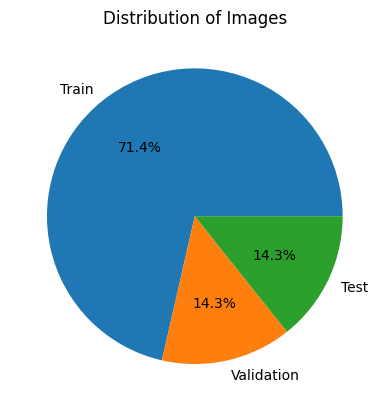

In [16]:
import matplotlib.pyplot as plt

labels = ["Train", "Validation", "Test"]
counts = [len(train_data), len(validation_data), len(test_data)]

fig, ax = plt.subplots()
ax.pie(counts, labels=labels, autopct="%1.1f%%")
ax.set_title("Distribution of Images")
plt.show()

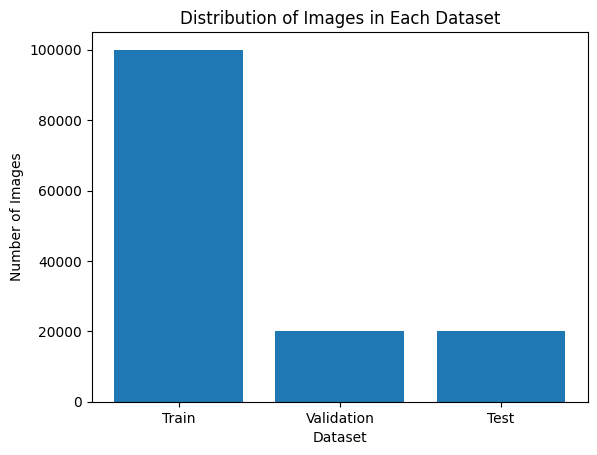

In [17]:
import matplotlib.pyplot as plt

train_size = len(train_data)
validation_size = len(validation_data)
test_size = len(test_data)

fig, ax = plt.subplots()
x = ['Train', 'Validation', 'Test']
y = [train_size, validation_size, test_size]
ax.bar(x, y)
ax.set_xlabel('Dataset')
ax.set_ylabel('Number of Images')
ax.set_title('Distribution of Images in Each Dataset')

plt.show()

# Convolutional Neural Networks (CNNs)



In [30]:
model_cnn = Sequential()

model_cnn.add(Conv2D(32,kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Dropout(0.2))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dropout(0.2))
model_cnn.add(Dense(1, activation='sigmoid'))

In [31]:
model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)       

In [ ]:
model_cnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model_cnn.fit(train_data_generator ,epochs = 10,validation_data= (validation_data_generator))

Epoch 1/10
3125/3125 [==============================] - 439s 137ms/step - loss: 0.3877 - accuracy: 0.8179 - val_loss: 0.2070 - val_accuracy: 0.9190
Epoch 2/10
3125/3125 [==============================] - 457s 146ms/step - loss: 0.1798 - accuracy: 0.9296 - val_loss: 0.1362 - val_accuracy: 0.9489
Epoch 3/10
 915/3125 [=======>......................] - ETA: 4:26 - loss: 0.1191 - accuracy: 0.9536

In [ ]:
test_loss, test_accuracy = model_cnn.evaluate(test_data_generator)
print(f'Loss: {test_loss}, Accuracy: {test_accuracy}')

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()


plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

predictions = model_cnn.predict(test_data_generator)
predicted_labels = np.where(predictions > 0.5, 1, 0)
true_labels = test_data_generator.classes

conf_matrix = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_data_generator.class_indices,
            yticklabels=test_data_generator.class_indices)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
class_names = list(test_data_generator.class_indices.keys())
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:")
print(report)

# XceptionNet

In [ ]:
base_model = Xception(weights='imagenet',include_top=False,input_shape=(256, 256, 3))

In [33]:
for layer in base_model.layers:
    layer.trainable = False

Xception_model = Sequential()
Xception_model.add(base_model)
Xception_model.add(Flatten())
Xception_model.add(BatchNormalization())
Xception_model.add(Dense(256, activation='relu'))
Xception_model.add(Dropout(0.5))
Xception_model.add(Dense(128, activation='relu'))
Xception_model.add(Dropout(0.5))
Xception_model.add(BatchNormalization())
Xception_model.add(Dense(1, activation='sigmoid'))

Xception_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 flatten_3 (Flatten)         (None, 131072)            0         
                                                                 
 batch_normalization_12 (Ba  (None, 131072)            524288    
 tchNormalization)                                               
                                                                 
 dense_8 (Dense)             (None, 256)               33554688  
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                      

In [ ]:
Xception_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = Xception_model.fit(train_data_generator ,epochs = 10,validation_data= (validation_data_generator))
print(history.history)

Epoch 1/10
3125/3125 [==============================] - 698s 221ms/step - loss: 0.4696 - accuracy: 0.7792 - val_loss: 0.3465 - val_accuracy: 0.8508
Epoch 2/10
3125/3125 [==============================] - 686s 220ms/step - loss: 0.3497 - accuracy: 0.8477 - val_loss: 0.3071 - val_accuracy: 0.8641
Epoch 3/10
3125/3125 [==============================] - 721s 231ms/step - loss: 0.2973 - accuracy: 0.8738 - val_loss: 0.2730 - val_accuracy: 0.8866
Epoch 4/10
3125/3125 [==============================] - 721s 231ms/step - loss: 0.2508 - accuracy: 0.8968 - val_loss: 0.2722 - val_accuracy: 0.8855
Epoch 5/10
3125/3125 [==============================] - 689s 221ms/step - loss: 0.2143 - accuracy: 0.9138 - val_loss: 0.2386 - val_accuracy: 0.9023
Epoch 6/10
3125/3125 [==============================] - 688s 220ms/step - loss: 0.1894 - accuracy: 0.9245 - val_loss: 0.2291 - val_accuracy: 0.9078
Epoch 7/10
3125/3125 [==============================] - 687s 220ms/step - loss: 0.1659 - accuracy: 0.9352 - val_

In [ ]:
test_loss, test_accuracy = Xception_model.evaluate(test_data_generator)
print(f'Loss: {test_loss}, Accuracy: {test_accuracy}')

625/625 [==============================] - 109s 175ms/step - loss: 0.2393 - accuracy: 0.9143
Loss: 0.23926308751106262, Accuracy: 0.9143000245094299


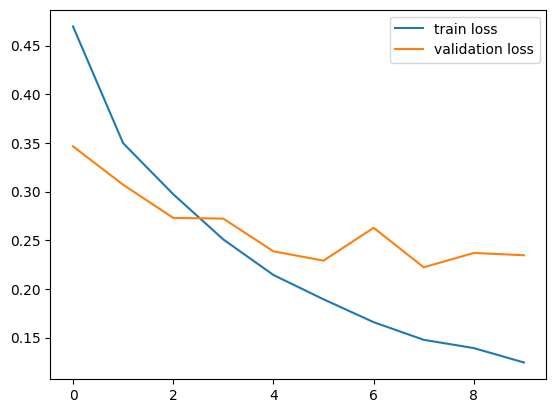

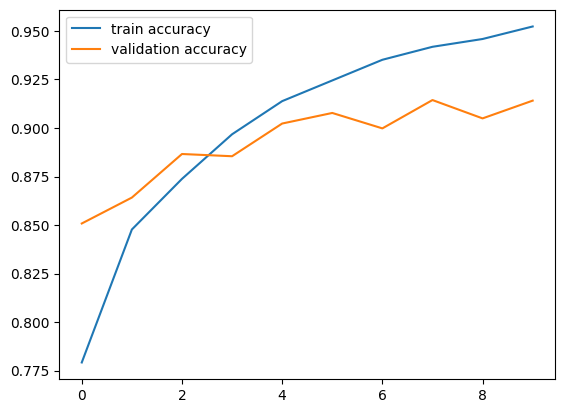

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

predictions = Xception_model.predict(test_data_generator)
predicted_labels = np.where(predictions > 0.5, 1, 0)
true_labels = test_data_generator.classes
conf_matrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_data_generator.class_indices,
            yticklabels=test_data_generator.class_indices)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
class_names = list(test_data_generator.class_indices.keys())
report = classification_report(true_labels, predicted_labels, target_names=class_names)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

        fake       0.90      0.94      0.92     10000
        real       0.94      0.89      0.91     10000

    accuracy                           0.91     20000
   macro avg       0.92      0.91      0.91     20000
weighted avg       0.92      0.91      0.91     20000



## ForensicTransfer

In [18]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import Xception, preprocess_input
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np


In [19]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in base_model.layers:
    layer.trainable = False

forensic_transfer_model = Sequential()
forensic_transfer_model.add(base_model)
forensic_transfer_model.add(Flatten())
forensic_transfer_model.add(BatchNormalization())
forensic_transfer_model.add(Dense(256, activation='relu'))
forensic_transfer_model.add(Dropout(0.5))
forensic_transfer_model.add(Dense(128, activation='relu'))
forensic_transfer_model.add(Dropout(0.5))
forensic_transfer_model.add(BatchNormalization())
forensic_transfer_model.add(Dense(1, activation='sigmoid'))

forensic_transfer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

forensic_transfer_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 flatten_1 (Flatten)         (None, 131072)            0         
                                                                 
 batch_normalization_10 (Ba  (None, 131072)            524288    
 tchNormalization)                                               
                                                                 
 dense_3 (Dense)             (None, 256)               33554688  
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                      

In [20]:
import tensorflow as tf

# Enable mixed precision if using a GPU
if tf.config.list_physical_devices('GPU'):
    from tensorflow.keras.mixed_precision import experimental as mixed_precision
    policy = mixed_precision.Policy('mixed_float16')
    mixed_precision.set_policy(policy)

history = forensic_transfer_model.fit(
    train_data_generator,
    epochs=10,
    validation_data=validation_data_generator,
    steps_per_epoch=10,  # Reduced number of steps
    validation_steps=5   # Reduced number of steps
)

Epoch 1/10
10/10 [==============================] - 146s 14s/step - loss: 0.7652 - accuracy: 0.5844 - val_loss: 1.2291 - val_accuracy: 0.5938
Epoch 2/10
10/10 [==============================] - 177s 19s/step - loss: 0.7535 - accuracy: 0.6313 - val_loss: 0.8570 - val_accuracy: 0.5625
Epoch 3/10
10/10 [==============================] - 145s 15s/step - loss: 0.7629 - accuracy: 0.6469 - val_loss: 0.7726 - val_accuracy: 0.6438
Epoch 4/10
10/10 [==============================] - 178s 19s/step - loss: 0.6445 - accuracy: 0.6969 - val_loss: 0.6309 - val_accuracy: 0.6500
Epoch 5/10
10/10 [==============================] - 136s 14s/step - loss: 0.6842 - accuracy: 0.6750 - val_loss: 0.6640 - val_accuracy: 0.6125
Epoch 6/10
10/10 [==============================] - 174s 18s/step - loss: 0.7554 - accuracy: 0.6219 - val_loss: 0.6050 - val_accuracy: 0.6875
Epoch 7/10
10/10 [==============================] - 148s 14s/step - loss: 0.6511 - accuracy: 0.6719 - val_loss: 0.5934 - val_accuracy: 0.6625
Epoch 

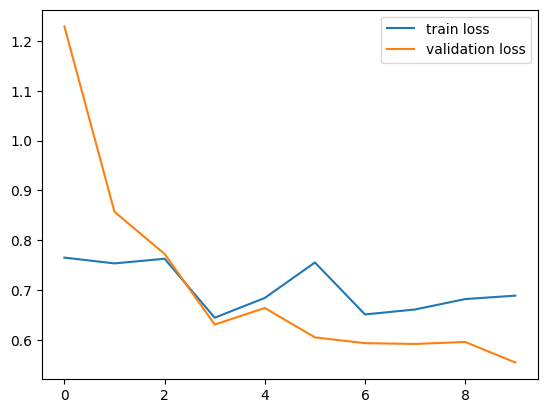

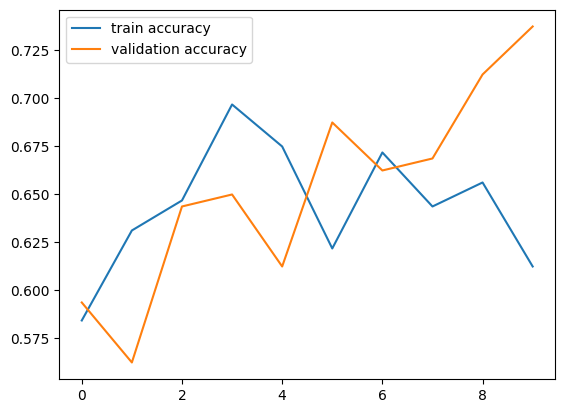

In [21]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [23]:
test_loss, test_accuracy = forensic_transfer_model.evaluate(test_data_generator, steps=5)
print(f'Loss: {test_loss}, Accuracy: {test_accuracy}')

5/5 [==============================] - 56s 9s/step - loss: 0.5815 - accuracy: 0.6812
Loss: 0.5815469026565552, Accuracy: 0.6812499761581421


5/5 [==============================] - 44s 9s/step


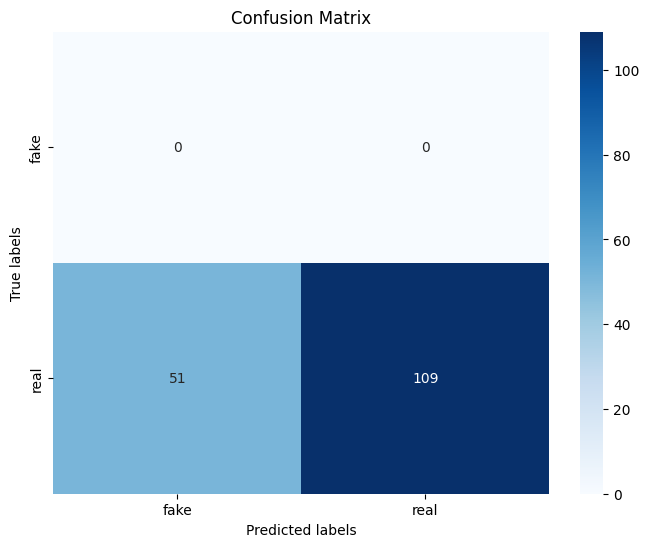

In [25]:
predictions = forensic_transfer_model.predict(test_data_generator, steps=5)
predicted_labels = np.where(predictions > 0.5, 1, 0)
true_labels = test_data_generator.classes[:len(predicted_labels)]

conf_matrix = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_data_generator.class_indices,
            yticklabels=test_data_generator.class_indices)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [26]:
class_names = list(test_data_generator.class_indices.keys())
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

        fake       0.00      0.00      0.00         0
        real       1.00      0.68      0.81       160

    accuracy                           0.68       160
   macro avg       0.50      0.34      0.41       160
weighted avg       1.00      0.68      0.81       160



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Images


1/1 [==============================] - 12s 12s/step


ForensicTransfer Model Predictions:


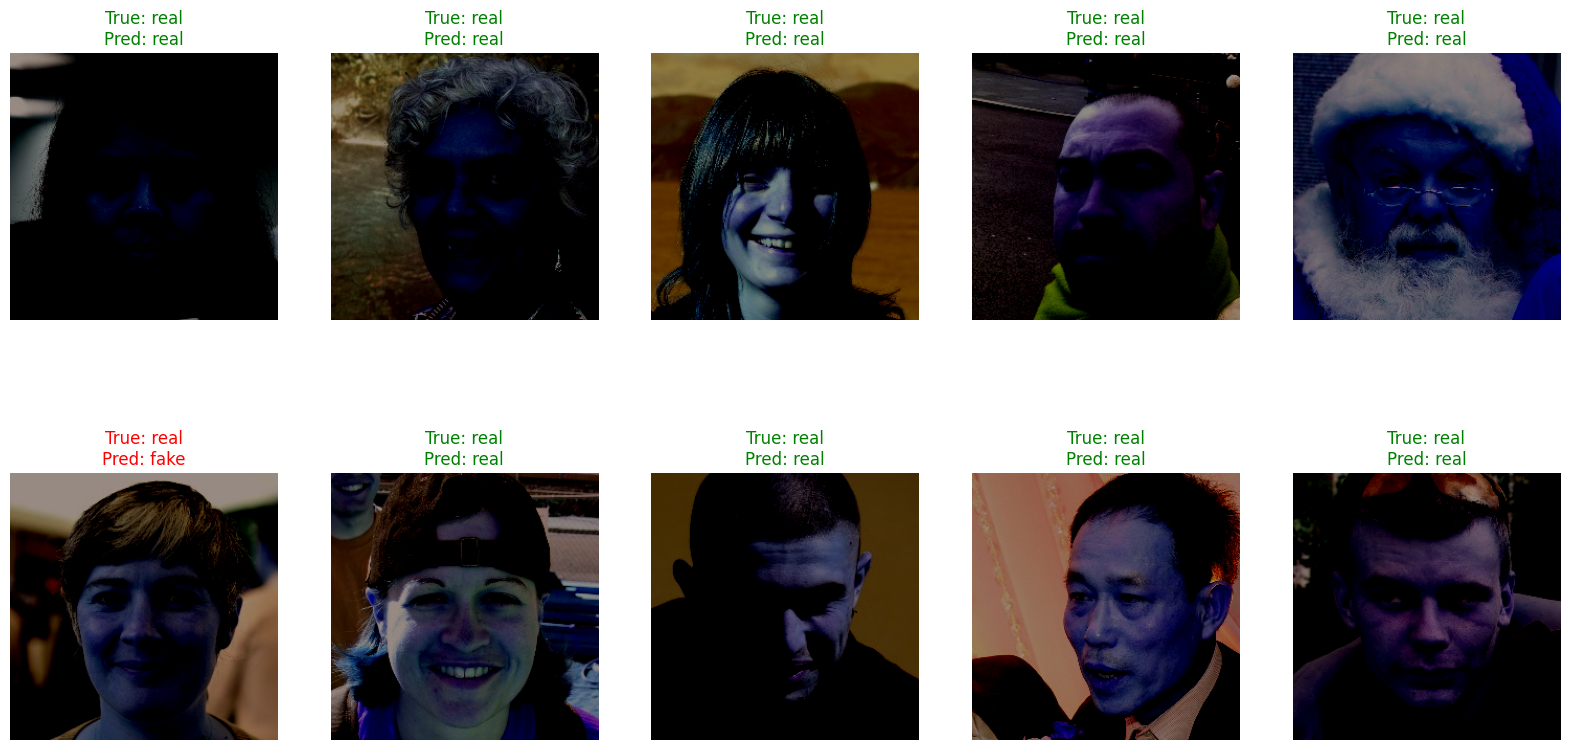

In [29]:
import matplotlib.pyplot as plt

# Function to plot images with true and predicted labels
def plot_images(images, true_labels, predicted_labels, class_names, num_images=10):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        true_label = class_names[int(true_labels[i])]
        predicted_label = class_names[int(predicted_labels[i])]
        plt.title(f"True: {true_label}\nPred: {predicted_label}", color='green' if true_label == predicted_label else 'red')
        plt.axis('off')
    plt.show()

# Extract a batch of images and labels from the test_data_generator
test_data_generator.reset()
images, labels = next(test_data_generator)

# Convert labels to integers
labels = labels.astype(int)



# Plot images with true and predicted labels for ForensicTransfer model
predictions_forensic = forensic_transfer_model.predict(images)
predicted_labels_forensic = np.where(predictions_forensic > 0.5, 1, 0).flatten()
print("ForensicTransfer Model Predictions:")
plot_images(images, labels, predicted_labels_forensic, class_names)


1/1 [==============================] - 2s 2s/step


CNN Model Predictions:


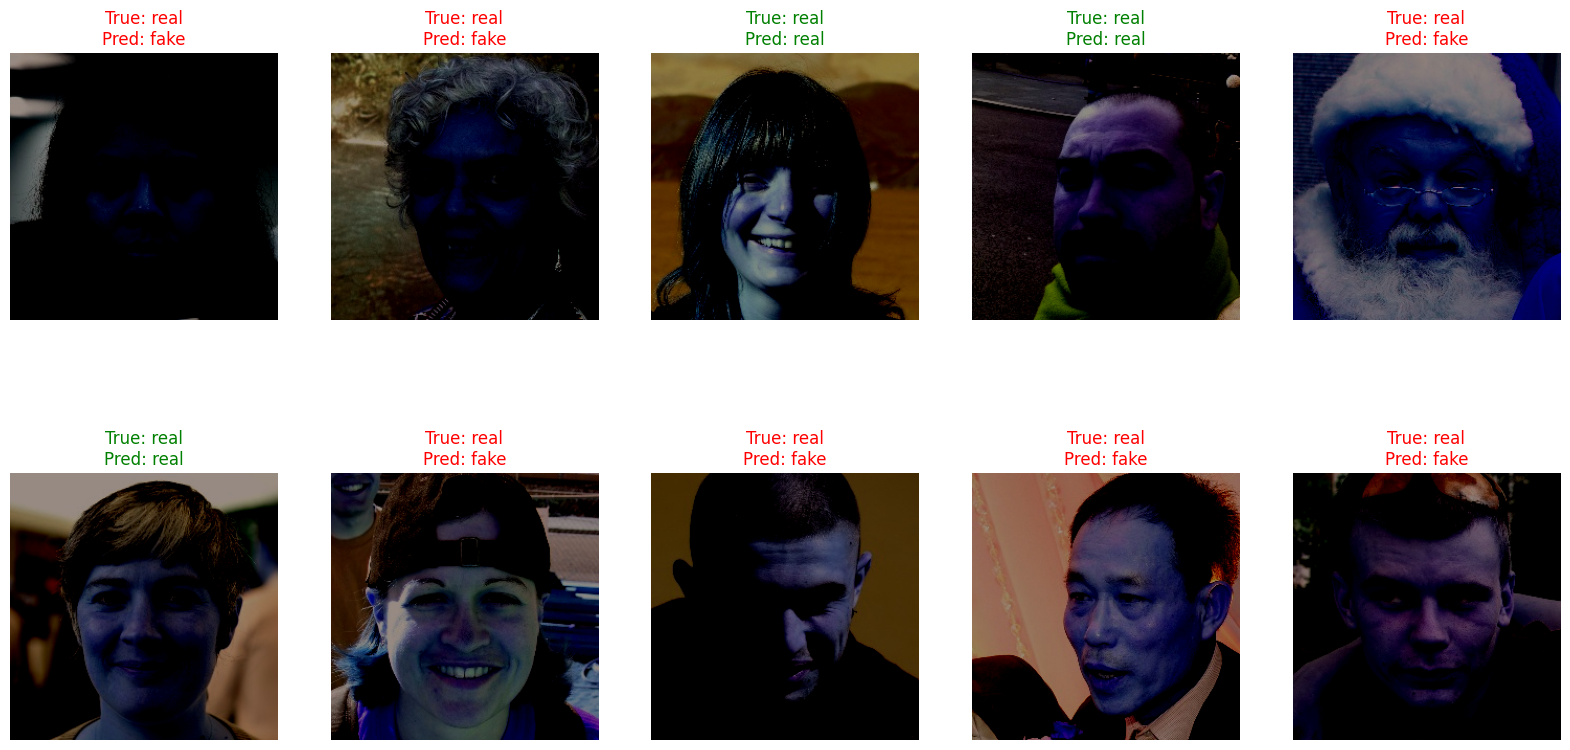

1/1 [==============================] - 19s 19s/step


Xception Model Predictions:


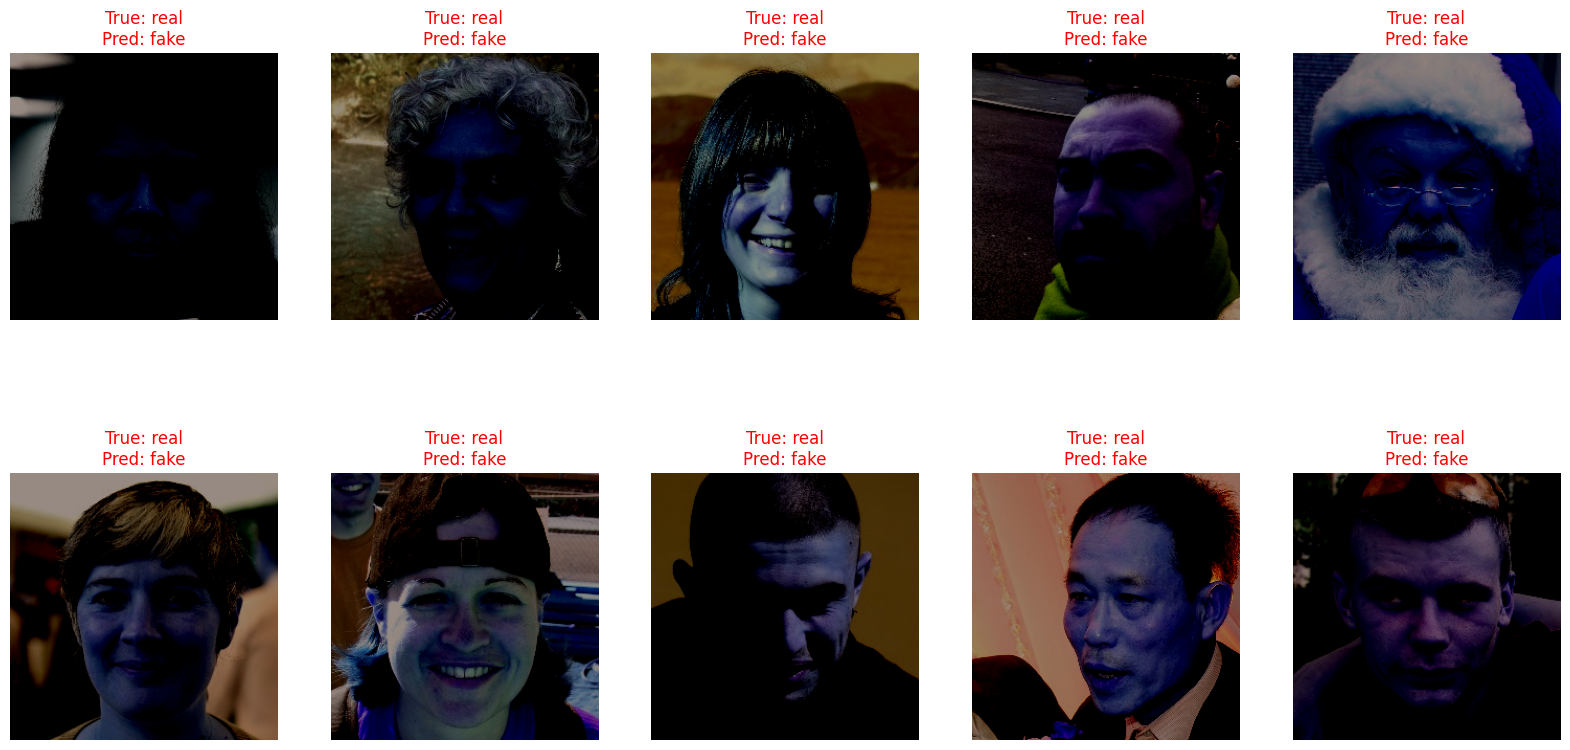

In [35]:
import matplotlib.pyplot as plt

# Function to plot images with true and predicted labels
def plot_images(images, true_labels, predicted_labels, class_names, num_images=10):
    plt.figure(figsize=(20, 10))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        true_label = class_names[int(true_labels[i])]
        predicted_label = class_names[int(predicted_labels[i])]
        plt.title(f"True: {true_label}\nPred: {predicted_label}", color='green' if true_label == predicted_label else 'red')
        plt.axis('off')
    plt.show()

# Extract a batch of images and labels from the test_data_generator
test_data_generator.reset()
images, labels = next(test_data_generator)

# Convert labels to integers
labels = labels.astype(int)

# Plot images with true and predicted labels for CNN model
predictions_cnn = model_cnn.predict(images)
predicted_labels_cnn = np.where(predictions_cnn > 0.5, 1, 0).flatten()
print("CNN Model Predictions:")
plot_images(images, labels, predicted_labels_cnn, class_names)

# Plot images with true and predicted labels for Xception model
predictions_xception = Xception_model.predict(images)
predicted_labels_xception = np.where(predictions_xception > 0.5, 1, 0).flatten()
print("Xception Model Predictions:")
plot_images(images, labels, predicted_labels_xception, class_names)



1/1 [==============================] - 8s 8s/step


ForensicTransfer Model Predictions:


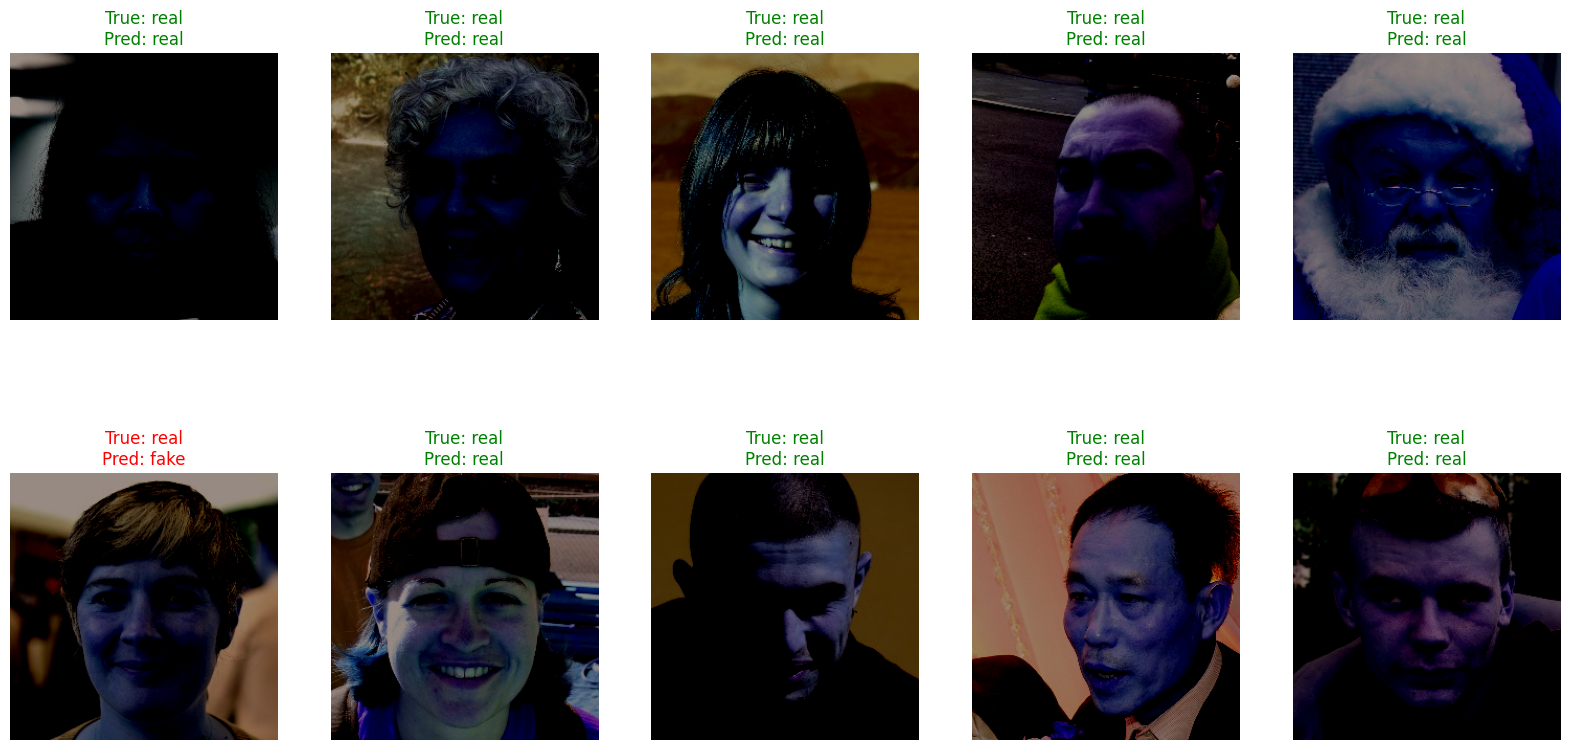

In [36]:
# Plot images with true and predicted labels for ForensicTransfer model
predictions_forensic = forensic_transfer_model.predict(images)
predicted_labels_forensic = np.where(predictions_forensic > 0.5, 1, 0).flatten()
print("ForensicTransfer Model Predictions:")
plot_images(images, labels, predicted_labels_forensic, class_names)
